In [ ]:
from google.colab import files
uploaded = files.upload()

Saving combined_periodhmr_DL01.xlsx to combined_periodhmr_DL01.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['combined_periodhmr_DL01.xlsx']))

In [ ]:
df.head()

,Unnamed: 0,period,Opening HMR
0,0,2019-04-01A,25541
1,1,2019-04-01B,25549
2,2,2019-04-01C,25557
3,3,2019-04-02A,25564
4,4,2019-04-02B,25572


In [ ]:
df.columns

Index(['Unnamed: 0', 'period', 'Opening HMR '], dtype='object')

In [ ]:
df.drop(["period", "Unnamed: 0"], axis=1, inplace=True)
df

,Opening HMR
0,25541
1,25549
2,25557
3,25564
4,25572
...,...
971,39684
972,39717
973,39724
974,39737


In [ ]:
df_temp = df
df_temp = df_temp.to_numpy()

In [ ]:
df_temp.size

976

In [ ]:
df_temp_train = df_temp[0:950]
df_temp_test = df_temp[950:]

In [ ]:
#preparing independent and dependent features

def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# now we define input sequence
timeseries_data = df_temp
# choose a number of time steps
n_steps = 10
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
len(X), len(y)

(966, 966)

In [ ]:
X_train = X[0:957]
y_train = y[0:957]
X_test = X[957:]
y_test = y[957:]

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
X_train.shape

(957, 10, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
# defining the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=50, verbose=0)


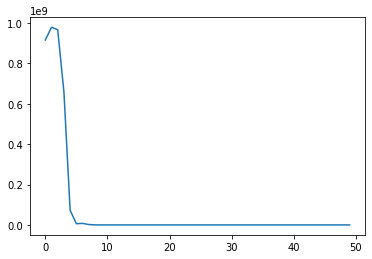

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
#testing the model
y_predicted = model.predict(X_test)
y_predicted = np.array(y_predicted)

In [ ]:
from math import sqrt
def rmse(y1, y2):
  ans=0
  for i in range (len(y1)):
    ans += ( (y1[i] - y2[i]) ** 2 )
  ans = ans/(len(y1))
  return sqrt(ans)

In [ ]:
rmse(y_test, y_predicted)

17.336803211236024

In [ ]:
def mas(y1, y2):
  ans=0
  for i in range (len(y1)):
    ans += abs(y1[i] - y2[i])
  ans = ans/(len(y1))
  return ans

In [ ]:
mas(y_test, y_predicted)

array([24.61154514])

In [ ]:
seq_x1 = df_temp[0:4]
X_test1 = []
X_test1.append(seq_x1)
X_test1 = np.array(X_test1)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], n_features)
model.predict(X_test1)

array([[25581.303]], dtype=float32)

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://3acf352c-9450-44f7-b98e-f2bed89821a0/assets
